In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
from zipfile import ZipFile 
with ZipFile("C:\\Users\\Taposh\\Desktop\\sample_project_1\\bank_data.zip", 'r') as zObject: 
  
    # Extracting all the members of the zip  
    # into a specific location. 
    zObject.extractall( 
        path="C:\\Users\\Taposh\\Desktop\\sample_project_1\\bank_data")

In [9]:
bank_data_path = '../bank_data/bank-data/bank-full.csv'
df = pd.read_csv(bank_data_path,delimiter=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


<AxesSubplot:xlabel='age', ylabel='balance'>

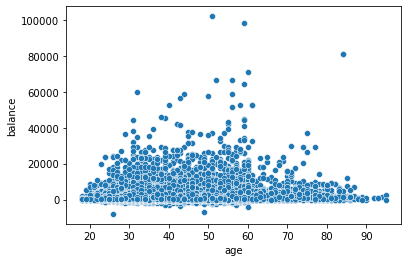

In [13]:
sns.scatterplot(data=df,x="age",y="balance")

In [19]:
#we need to transform all data to uint64 using one hot encoding.
df['job']=df['job'].astype('category')
df['marital'] =df['marital'].astype('category')
df['education']=df['education'].astype('category')
df['default']=df['default'].astype('category')
df['housing']=df['housing'].astype('category')
df['loan']=df['loan'].astype('category')
df['contact']=df['contact'].astype('category')
df['month']=df['month'].astype('category')
df['poutcome']=df['poutcome'].astype('category')
df['y']=df['y'].astype('category')
df['job'] = df['job'].cat.codes 
df['marital'] = df['marital'].cat.codes
df['education'] = df['education'].cat.codes
df['default'] = df['default'].cat.codes
df['housing'] = df['housing'].cat.codes
df['loan'] = df['loan'].cat.codes
df['contact'] = df['contact'].cat.codes
df['month'] = df['month'].cat.codes
df['poutcome'] = df['poutcome'].cat.codes
df['y'] = df['y'].cat.codes
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(
    df[['job', 'marital','education', 'default','housing', 'loan','contact', 'month','poutcome', 'y']]).toarray())
df_after_OHE = df.join(enc_data)
print(df_after_OHE)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    4        1          2        0     2143        1     0        2   
1       44    9        2          1        0       29        1     0        2   
2       33    2        1          1        0        2        1     1        2   
3       47    1        1          3        0     1506        1     0        2   
4       33   11        2          3        0        1        0     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    9        1          2        0      825        0     0        0   
45207   71    5        0          0        0     1729        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45209   57    1        1          1        0      668        0     0        1   
45210   37    2        1          1        0     2971        0     0        0   

       day  ...   36   37  

In [21]:
df_after_OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 63 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  int8   
 2   marital    45211 non-null  int8   
 3   education  45211 non-null  int8   
 4   default    45211 non-null  int8   
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int8   
 7   loan       45211 non-null  int8   
 8   contact    45211 non-null  int8   
 9   day        45211 non-null  int64  
 10  month      45211 non-null  int8   
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  int8   
 16  y          45211 non-null  int8   
 17  0          45211 non-null  float64
 18  1          45211 non-null  float64
 19  2          45211 non-null  float64
 20  3     

In [23]:
#lets apply PCA to this as there are too many features.First lets split train and test data and standardize it.
X = df_after_OHE.drop(columns=['y'])
Y = df_after_OHE['y']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 45)
datasetscaler = StandardScaler()
scaled_X_data_train = datasetscaler.fit_transform(X_train)
scaled_X_data_test = datasetscaler.transform(X_test)
pca = PCA(n_components=0.90)
X_train_after_pca = pca.fit_transform(scaled_X_data_train)
X_test_after_pca = pca.transform(scaled_X_data_test)

E:\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
E:\New folder\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [25]:
#lets do logistic regression
model = LogisticRegression(max_iter = 5000,penalty ='l2')
model.fit(X_train_after_pca,Y_train)

LogisticRegression(max_iter=5000)

In [29]:
y_prediction = model.predict(X_test_after_pca)
accuracy_score(Y_test,y_prediction)

0.9993365033727746